# **Credit Risk Prediction Using Machine Learning**

## **Project Overview**  
The goal of this project is to develop a machine learning model to predict whether a customer poses a high or low credit risk. By analyzing historical credit data, the project identifies patterns and features that influence creditworthiness, aiding financial institutions in making better loan and credit decisions.

---

## **Business Problem**  
Financial institutions face difficulties in evaluating credit risk accurately. A robust predictive model can:  
- Minimize loan defaults.  
- Enhance credit decision efficiency.  
- Promote fairness through data-driven insights.  

This project aims to provide a streamlined, reliable, and automated solution to these challenges.

---

## **Goals and Objectives**  

### 1. **Data Understanding and Preparation**  
- Explore and analyze the dataset for key patterns.  
- Handle missing values, imbalanced classes, and categorical data to ensure suitability for modeling.  

### 2. **Model Development**  
- Experiment with various machine learning algorithms for binary classification (e.g., good/bad credit risk).  
- Optimize the models to maximize predictive performance.  

### 3. **Model Evaluation**  
- Assess model performance using precision, recall, F1-score, and AUC-ROC metrics.  
- Validate the best-performing model on a hold-out dataset to ensure generalizability.  

---

## **Data Description**  
The dataset contains records of individuals’ demographic, financial, and credit information:  

- **person_age**: Age  
- **person_income**: Annual income  
- **person_home_ownership**: Home ownership  
- **person_emp_length**: Employment length (in years)  
- **loan_intent**: Loan intent  
- **loan_amnt**: Loan amount  
- **loan_int_rate**: Interest rate  
- **loan_status**: Loan status (0 = non-default, 1 = default)  
- **loan_percent_income**: Percent income  
- **cb_person_default_on_file**: Historical default  
- **cb_person_cred_hist_length**: Credit history length  

---

## **Work Flow**  

### 1. **Exploratory Data Analysis (EDA)**  
- Analyze variable distributions and relationships with the target variable.  
- Visualize data insights using plots such as histograms, bar charts, and heatmaps.  

### 2. **Preprocessed Data**  
- Address missing values and outliers.  
- Normalize numerical features and encode categorical features for model compatibility.  

### 3. **Machine Learning Models**  
- Train and compare algorithms like Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks.  
- Use techniques like SMOTE or class weights to address imbalanced data.  

### 4. **Pipeline Implementation**  
- Build an end-to-end pipeline integrating data preprocessing, feature scaling, and prediction modules.  

### 5. **Model Evaluation Report**  
- Summarize results for all models, selecting the best based on evaluation metrics.  
- Provide a detailed analysis using confusion matrices, classification reports, and AUC-ROC curves.   

---

## **Outcome**  
This project will empower financial institutions with:  
- Reliable predictions for credit risk.  
- Faster and more accurate decision-making processes.  
- Improved financial risk management through data-driven insights.  

## **Importing Main Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## **Importing Dataset**

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


## **Descriptive statistics**

In [3]:
print("Length of data: ", len(df))

Length of data:  32581


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## **Data Imputation**

In [6]:
# Check for null values
print('Null values in data:\n' , df.isnull().sum())

Null values in data:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [7]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)



Percentage of missing values in each column:
 person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


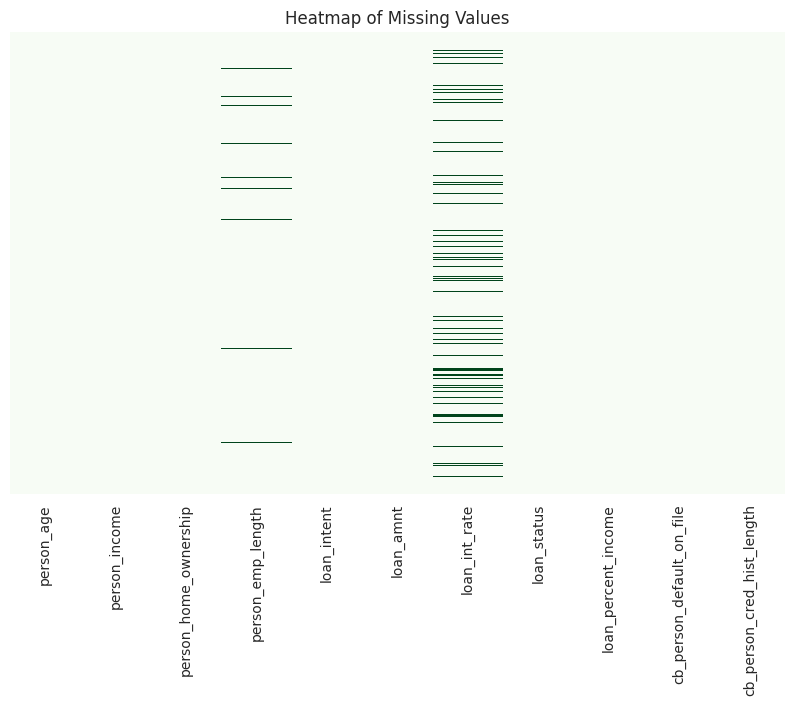

In [8]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Greens', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [9]:
# Create missing value indicators for the relevant columns
df['person_emp_length_missing'] = df['person_emp_length'].isnull().astype(int)
df['loan_int_rate_missing'] = df['loan_int_rate'].isnull().astype(int)

# Compute correlations of these indicators with 'loan_status'
correlation_person_emp_length = df['person_emp_length_missing'].corr(df['loan_status'])
correlation_loan_int_rate = df['loan_int_rate_missing'].corr(df['loan_status'])

# Display the results
print(f"Correlation of missing 'person_emp_length' with 'loan_status': {correlation_person_emp_length}")
print(f"Correlation of missing 'loan_int_rate' with 'loan_status': {correlation_loan_int_rate}")


Correlation of missing 'person_emp_length' with 'loan_status': 0.03944038467227493
Correlation of missing 'loan_int_rate' with 'loan_status': -0.009046246175647128


### Correlation Analysis of Missing Values with 'Loan Status'

In the previous step, we computed the correlation between the missing values in `person_emp_length` and `loan_int_rate` with the target variable `loan_status`. The results showed the following correlations:

- **Correlation of missing `person_emp_length` with `loan_status`:** 0.03944038467227493 (Value obtained from the correlation output)
- **Correlation of missing `loan_int_rate` with `loan_status`:** -0.009046246175647128 (Value obtained from the correlation output)

These correlations suggest how the missingness of these two features may be related to the loan status. Given that missing values could impact the analysis, it is important to handle them carefully. 

### Handling Missing Data by Imputing with Median

Based on the analysis above and considering the nature of the data, we will proceed by filling the missing values in the `person_emp_length` and `loan_int_rate` columns with their respective **median values**. This method is a common and robust approach for dealing with missing numerical data, as it helps preserve the central tendency of the data while mitigating the influence of outliers.


In [10]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)


## **Post-Imputation Checks**

In [11]:
# Check if any null values remain
print("Remaining missing values:\n", df.isnull().sum())

# Validate statistical distribution
print("\nStatistical summary after imputation:\n", df.describe())

Remaining missing values:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
person_emp_length_missing     0
loan_int_rate_missing         0
dtype: int64

Statistical summary after imputation:
          person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%    

### **Initial Project Question**  
Can we predict the credit risk of a customer (good or bad) based on their financial, and credit-related attributes?

---

### **Revised Project Question Based on EDA Insights**  
Which customer attributes (such as income, credit score, and debt-to-income ratio) are the most significant predictors of credit risk, and how can we utilize these insights to enhance the predictive accuracy of machine learning models?

---

### **Insights Gained Through EDA**  
- **Credit Score and Debt-to-Income Ratio**: Higher credit scores and lower debt-to-income ratios are strongly associated with lower credit risk.  
- **Employment Status and Income**: Applicants with stable employment and higher annual income demonstrate better creditworthiness.  
- **Previous Defaults**: Customers with a history of defaults exhibit a significantly higher risk of bad credit.  
- **Credit History Length**: A longer credit history correlates with lower credit risk, often reflecting financial stability.  


# **New Features and Polynomial Features**

In [12]:
# Adding New Features

# Debt-to-Income Ratio (DTI): Assessing whether the borrower can manage monthly payments based on income
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Interest-to-Income Ratio: Shows how much of the income is used to pay interest on the loan
df['interest_to_income_ratio'] = df['loan_int_rate'] / df['person_income']

# Polynomial Features

# Creating polynomial features for loan_amnt, person_income, and cb_person_cred_hist_length
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['person_income', 'loan_amnt', 'cb_person_cred_hist_length']])

# Convert the polynomial features into a DataFrame with meaningful column names
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['person_income', 'loan_amnt', 'cb_person_cred_hist_length']))

# Concatenate polynomial features with the original DataFrame
df = pd.concat([df.drop(['person_income', 'loan_amnt', 'cb_person_cred_hist_length'], axis=1), poly_features_df], axis=1)
df


,person_age,person_home_ownership,person_emp_length,loan_intent,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,person_emp_length_missing,loan_int_rate_missing,...,interest_to_income_ratio,person_income,loan_amnt,cb_person_cred_hist_length,person_income^2,person_income loan_amnt,person_income cb_person_cred_hist_length,loan_amnt^2,loan_amnt cb_person_cred_hist_length,cb_person_cred_hist_length^2
0,22,RENT,123.0,PERSONAL,16.02,1,0.59,Y,0,0,...,0.000272,59000.0,35000.0,3.0,3.481000e+09,2.065000e+09,177000.0,1.225000e+09,105000.0,9.0
1,21,OWN,5.0,EDUCATION,11.14,0,0.10,N,0,0,...,0.001160,9600.0,1000.0,2.0,9.216000e+07,9.600000e+06,19200.0,1.000000e+06,2000.0,4.0
2,25,MORTGAGE,1.0,MEDICAL,12.87,1,0.57,N,0,0,...,0.001341,9600.0,5500.0,3.0,9.216000e+07,5.280000e+07,28800.0,3.025000e+07,16500.0,9.0
3,23,RENT,4.0,MEDICAL,15.23,1,0.53,N,0,0,...,0.000233,65500.0,35000.0,2.0,4.290250e+09,2.292500e+09,131000.0,1.225000e+09,70000.0,4.0
4,24,RENT,8.0,MEDICAL,14.27,1,0.55,Y,0,0,...,0.000262,54400.0,35000.0,4.0,2.959360e+09,1.904000e+09,217600.0,1.225000e+09,140000.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,MORTGAGE,1.0,PERSONAL,13.16,0,0.11,N,0,0,...,0.000248,53000.0,5800.0,30.0,2.809000e+09,3.074000e+08,1590000.0,3.364000e+07,174000.0,900.0
32577,54,MORTGAGE,4.0,PERSONAL,7.49,0,0.15,N,0,0,...,0.000062,120000.0,17625.0,19.0,1.440000e+10,2.115000e+09,2280000.0,3.106406e+08,334875.0,361.0
32578,65,RENT,3.0,HOMEIMPROVEMENT,10.99,1,0.46,N,0,0,...,0.000145,76000.0,35000.0,28.0,5.776000e+09,2.660000e+09,2128000.0,1.225000e+09,980000.0,784.0
32579,56,MORTGAGE,5.0,PERSONAL,11.48,0,0.10,N,0,0,...,0.000077,150000.0,15000.0,26.0,2.250000e+10,2.250000e+09,3900000.0,2.250000e+08,390000.0,676.0


# **Data visualizations**

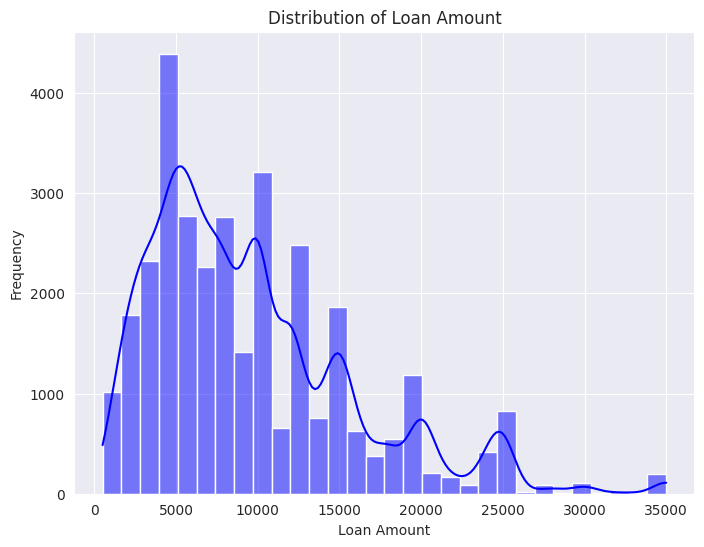

In [13]:
# distribution of loan amounts
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


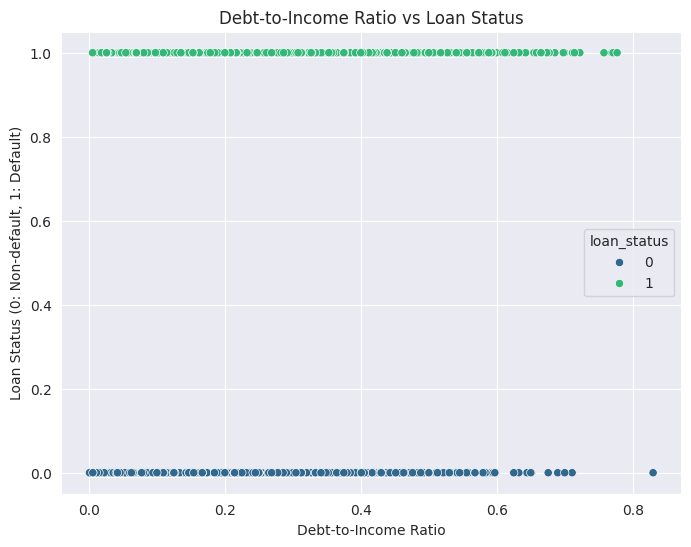

In [14]:
# Debt-to-Income Ratio vs Loan Status
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['debt_to_income_ratio'], y=df['loan_status'], hue=df['loan_status'], palette='viridis')
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Status (0: Non-default, 1: Default)')
plt.show()


   person_age  person_emp_length  loan_int_rate  loan_status  \
0          22              123.0          16.02            1   
1          21                5.0          11.14            0   
2          25                1.0          12.87            1   
3          23                4.0          15.23            1   
4          24                8.0          14.27            1   

   loan_percent_income  person_emp_length_missing  loan_int_rate_missing  \
0                 0.59                          0                      0   
1                 0.10                          0                      0   
2                 0.57                          0                      0   
3                 0.53                          0                      0   
4                 0.55                          0                      0   

   debt_to_income_ratio  interest_to_income_ratio  person_income  loan_amnt  \
0              0.593220                  0.000272        59000.0    35000.0   


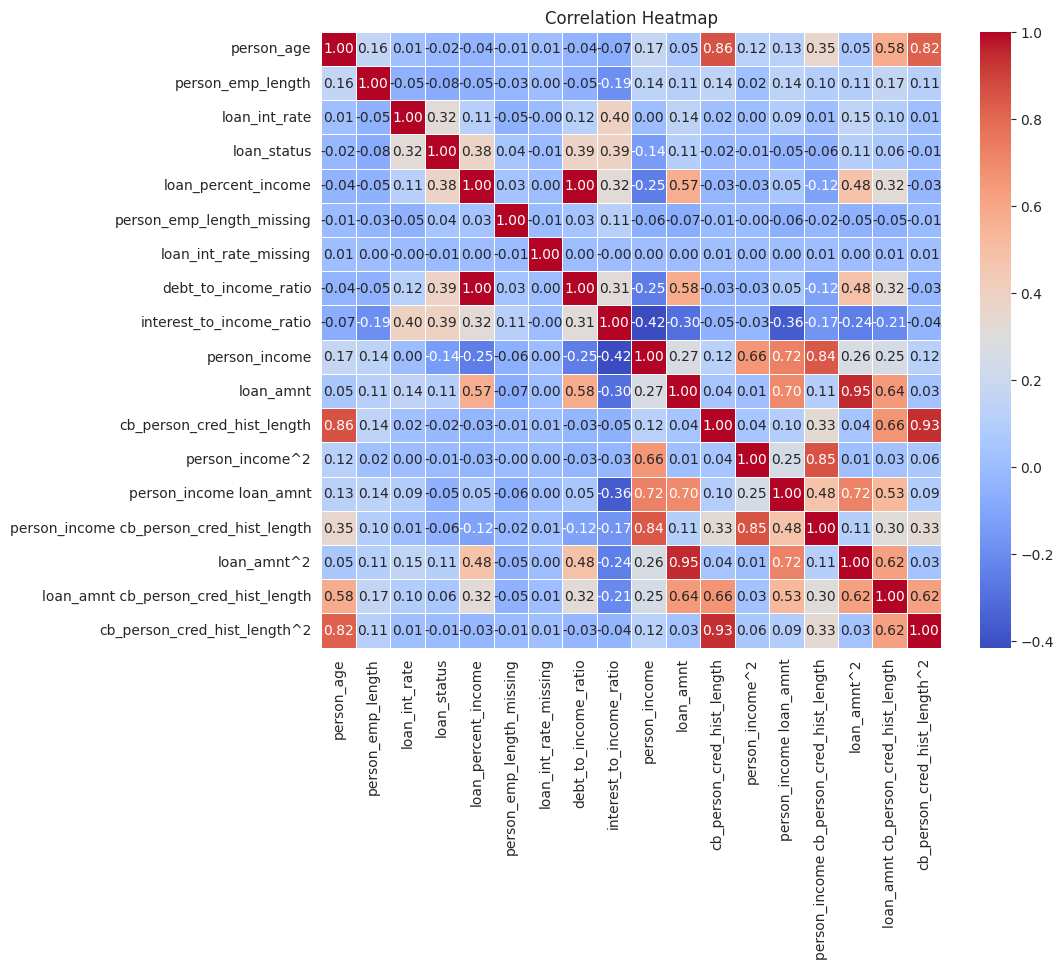

In [15]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Filter the dataframe to only include numerical columns
df_numerical = df[numerical_cols]

# Check the numerical columns
print(df_numerical.head())

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Data Transformation**

In [16]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)

# Select numerical columns to scale
numerical_columns = ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_income', 'debt_to_income_ratio', 'interest_to_income_ratio']

# Initialize and fit the StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,person_age,person_emp_length,loan_int_rate,loan_status,loan_percent_income,person_emp_length_missing,loan_int_rate_missing,debt_to_income_ratio,interest_to_income_ratio,person_income,...,cb_person_cred_hist_length^2,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,22,123.0,1.625921,1,3.931411,0,0,3.948415,0.220099,-0.114143,...,9.0,False,False,True,False,False,False,True,False,True
1,21,5.0,0.042310,0,-0.657458,0,0,-0.620163,5.390666,-0.911147,...,4.0,False,True,False,True,False,False,False,False,False
2,25,1.0,0.603713,1,3.744110,0,0,3.758745,6.438915,-0.911147,...,9.0,False,False,False,False,False,True,False,False,False
3,23,4.0,1.369558,1,3.369508,0,0,3.398479,-0.006795,-0.009274,...,4.0,False,False,True,False,False,True,False,False,False
4,24,8.0,1.058028,1,3.556809,0,0,4.417012,0.166530,-0.188358,...,16.0,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,1.0,0.697821,0,-0.563808,0,0,-0.570958,0.085011,-0.210945,...,900.0,False,False,False,False,False,False,True,False,False
32577,54,4.0,-1.142154,0,-0.189207,0,0,-0.221196,-0.996259,0.870011,...,361.0,False,False,False,False,False,False,True,False,False
32578,65,3.0,-0.006367,1,2.713956,0,0,2.708831,-0.518179,0.160129,...,784.0,False,False,True,False,True,False,False,False,False
32579,56,5.0,0.152643,0,-0.657458,0,0,-0.659087,-0.914145,1.354021,...,676.0,False,False,False,False,False,False,True,False,False


# **Data Preparation:**
We will use the cleaned and preprocessed dataset from the EDA phase. The categorical variables have been converted into dummy variables, and the data has been split into training and validation sets.

# **Baseline Model Selection:**
For the baseline model, we will use the classification algorithm since the target column is discreetly labeled. This will provide a benchmark to compare more complex models.

# **Model Development and Evaluation:**

**Splitting the Data:**
  * Training set: 80% of the data
  * Validation set: 20% of the data

In [17]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Split the data into features (X) and target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((26064, 26), (6517, 26), (26064,), (6517,))

# **Evaluate Algorithms : (KNN, Random Forest, Decision Tree, XGBoost)**

In [32]:
# Define the algorithms to be evaluated
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results[name] = cv_results
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

KNN: 0.8231 (0.0060)
Random Forest: 0.9123 (0.0031)
Decision Tree: 0.8709 (0.0067)
XGBoost: 0.9228 (0.0040)


# **Compare Algorithms** (Based on Mean Accuracy & Standard Deviation)

In [33]:
results_mean = {name: np.mean(scores) for name, scores in results.items()}
print("Mean Accuracy:")
print("---------------------------------------")
results_mean,

Mean Accuracy:
---------------------------------------


({'KNN': np.float64(0.8231276794485358),
  'Random Forest': np.float64(0.9123308578562763),
  'Decision Tree': np.float64(0.8708569024713851),
  'XGBoost': np.float64(0.9228049312892471)},)

In [34]:
results_std = {name: np.std(scores) for name, scores in results.items()}
print("Standard Deviation:")
print("---------------------------------------")
results_std

Standard Deviation:
---------------------------------------


{'KNN': np.float64(0.0059609735889388305),
 'Random Forest': np.float64(0.003093890913117117),
 'Decision Tree': np.float64(0.00672767250441457),
 'XGBoost': np.float64(0.0039546837396579985)}

# **Improve Accuracy :**  ***Algorithm Tuning*** (Finding the Best Estimators)

In [35]:
param_grid = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform']
    },
    'Random Forest': {
        'n_estimators': [100, 150],
        'max_features': ['sqrt'],
        'max_depth': [10, 20]
    },
    'Decision Tree': {
        'max_depth': [10, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.1],
        'subsample': [0.8]
    }
}

best_estimators = {}
for name, model in models.items():
    print(f"Starting grid search for {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"{name} best params: {grid_search.best_params_}")
best_estimators


Starting grid search for KNN...
KNN best params: {'n_neighbors': 7, 'weights': 'uniform'}
Starting grid search for Random Forest...
Random Forest best params: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 150}
Starting grid search for Decision Tree...
Decision Tree best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Starting grid search for XGBoost...
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


{'KNN': KNeighborsClassifier(n_neighbors=7),
 'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=150),
 'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

# **Evaluation Metrics:**
  * **Accuracy:** The proportion of correctly predicted instances out of the total instances.
  * **Classification Report:** Includes precision, recall, and F1-score for both classes.
  * **Confusion Matrix:** A table used to describe the performance of the model.

# **Finalize Model :** ***Predictions on validation dataset*** **(Using Pipeline)**

In [36]:
best_estimators['KNN']

KNeighborsClassifier(n_neighbors=7)

In [37]:
# Define a pipeline with preprocessing and the KNN Model
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', best_estimators['KNN'])  # KNN model with best parameters
])

pipeline_knn

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

In [38]:
# Fit the pipeline on the training data
pipeline_knn.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_pipeline_knn = pipeline_knn.predict(X_val)

# Evaluate the pipeline model
accuracy_pipeline_knn = accuracy_score(y_val, y_pred_pipeline_knn)
classification_report_pipeline_knn = classification_report(y_val, y_pred_pipeline_knn)
confusion_matrix_pipeline_knn = confusion_matrix(y_val, y_pred_pipeline_knn)

accuracy_pipeline_knn, classification_report_pipeline_knn, confusion_matrix_pipeline_knn

print("Accuracy: ", accuracy_pipeline_knn)
print("---------------------------------------------------------------")
print("Classification Report:")
print("---------------------------------------------------------------")
print(classification_report_pipeline_knn)
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print("---------------------------------------------------------------")
confusion_matrix_pipeline_knn

Accuracy:  0.8714132269449133
---------------------------------------------------------------
Classification Report:
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5095
           1       0.82      0.53      0.64      1422

    accuracy                           0.87      6517
   macro avg       0.85      0.75      0.78      6517
weighted avg       0.87      0.87      0.86      6517

---------------------------------------------------------------
Confusion Matrix:
---------------------------------------------------------------


array([[4929,  166],
       [ 672,  750]])

In [39]:
best_estimators['Random Forest']

RandomForestClassifier(max_depth=20, n_estimators=150)

In [40]:
# Define a pipeline with preprocessing and the Random Forest model
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', best_estimators['Random Forest'])  # Random Forest model with best parameters
])

pipeline_rf

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=150))])

In [41]:
# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_pipeline_rf = pipeline_rf.predict(X_val)

# Evaluate the pipeline model
accuracy_pipeline_rf = accuracy_score(y_val, y_pred_pipeline_rf)
classification_report_pipeline_rf = classification_report(y_val, y_pred_pipeline_rf)
confusion_matrix_pipeline_rf = confusion_matrix(y_val, y_pred_pipeline_rf)

accuracy_pipeline_rf, classification_report_pipeline_rf, confusion_matrix_pipeline_rf

print("Accuracy: ", accuracy_pipeline_rf)
print("---------------------------------------------------------------")
print("Classification Report:")
print("---------------------------------------------------------------")
print(classification_report_pipeline_rf)
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print("---------------------------------------------------------------")
confusion_matrix_pipeline_rf

Accuracy:  0.918060457265613
---------------------------------------------------------------
Classification Report:
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5095
           1       0.95      0.66      0.78      1422

    accuracy                           0.92      6517
   macro avg       0.93      0.82      0.86      6517
weighted avg       0.92      0.92      0.91      6517

---------------------------------------------------------------
Confusion Matrix:
---------------------------------------------------------------


array([[5047,   48],
       [ 486,  936]])

In [42]:
best_estimators['Decision Tree']

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [43]:
# Define a pipeline with preprocessing and the Decision Tree model
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', best_estimators['Decision Tree'])  # Decision Tree model with best parameters
])

pipeline_dt

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=5))])

In [44]:
# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_pipeline_dt = pipeline_dt.predict(X_val)

# Evaluate the pipeline model
accuracy_pipeline_dt = accuracy_score(y_val, y_pred_pipeline_dt)
classification_report_pipeline_dt = classification_report(y_val, y_pred_pipeline_dt)
confusion_matrix_pipeline_dt = confusion_matrix(y_val, y_pred_pipeline_dt)

accuracy_pipeline_dt, classification_report_pipeline_dt, confusion_matrix_pipeline_dt

print("Accuracy: ", accuracy_pipeline_dt)
print("---------------------------------------------------------------")
print("Classification Report:")
print("---------------------------------------------------------------")
print(classification_report_pipeline_dt)
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print("---------------------------------------------------------------")
confusion_matrix_pipeline_dt

Accuracy:  0.9140708915145005
---------------------------------------------------------------
Classification Report:
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5095
           1       0.92      0.67      0.77      1422

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517

---------------------------------------------------------------
Confusion Matrix:
---------------------------------------------------------------


array([[5009,   86],
       [ 474,  948]])

In [46]:
best_estimators['XGBoost']

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
# Define a pipeline with preprocessing and the XGBoost model
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', best_estimators['XGBoost'])  # XGBoost model with best parameters
])

pipeline_xgb

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [48]:
# Fit the pipeline on the training data
pipeline_xgb.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_pipeline_xgb = pipeline_xgb.predict(X_val)

# Evaluate the pipeline model
accuracy_pipeline_xgb = accuracy_score(y_val, y_pred_pipeline_xgb)
classification_report_pipeline_xgb = classification_report(y_val, y_pred_pipeline_xgb)
confusion_matrix_pipeline_xgb = confusion_matrix(y_val, y_pred_pipeline_xgb)

accuracy_pipeline_xgb, classification_report_pipeline_xgb, confusion_matrix_pipeline_xgb

print("Accuracy: ", accuracy_pipeline_xgb)
print("---------------------------------------------------------------")
print("Classification Report:")
print("---------------------------------------------------------------")
print(classification_report_pipeline_xgb)
print("---------------------------------------------------------------")
print("Confusion Matrix:")
print("---------------------------------------------------------------")
confusion_matrix_pipeline_xgb

Accuracy:  0.919901795304588
---------------------------------------------------------------
Classification Report:
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5095
           1       0.95      0.67      0.78      1422

    accuracy                           0.92      6517
   macro avg       0.93      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517

---------------------------------------------------------------
Confusion Matrix:
---------------------------------------------------------------


array([[5047,   48],
       [ 474,  948]])

# **Results & Discussion**

**Best Model for the Dataset :**
According to the accuracy score XGBoost, Random Forest and Decision Tree proved to be the best model for our dataset.